# Uso y aplicación de los métodos de agrupamiento


# Introducción

# Organización de documentos mediante clustering

El Clustering Documental consiste en organizar un conjunto de documentos en una serie de categorías coherentes. Esta técnica se encuentra dentro del ámbito de la Minería de Textos, y es una tarea muy útil para la navegación sistemática sobre la colección de los documentos.
Otras aplicaciones que tiene el clustering de documentos son:
- Recuperación de Información.
- Derivar información nueva de los textos.
- Extracción de información oculta y predecible de grandes bases de datos.
- Minería de opinión.
- Etc.

En esta técnica, cada documento puede ser representado ya sea en forma binaria, mostrando la presencia o ausencia de una palabra en el comento para crear un vector binario. Otra manera consiste en asignar una serie de pesos en base a la frecuencia de aparición de cada palabra en el documento, o incluso en la colección completa.
Además de la creación del vector de características, se suele realizar un preprocesado de cada texto, como la eliminación de Stop Words, Lemmatization o Stemming, etc. También se suelen descartar aquellas palabras con frecuencias de aparición muy altas o muy bajas, ya que se las considera poco representativas.


## Descripción del Dataset

El dataset utilizado para la realización de esta práctica ha sido extraído de https://archive.ics.uci.edu/ml/datasets/Bag+of+Words. Consiste en cinco colecciones de textos representados por sus respectivos vectores. De estas cinco colecciones de textos se ha seleccionado la denominada como KOS blog entries.
Dicha colección está formada por 3430 documentos, donde cada documento está representado por un vector de 6906 palabras.
El formato del dataset consiste en 3 líneas de cabecera que muestran el número de documentos, el tamaño del vector y el número total de palabras, seguidas de tripletas con la forma (id del documento, id de la palabra, conteo de palabras).
Por último, para la creación de este dataset se ha realizado tokenización de los textos y se han eliminado las stopwords. Además, sólo se han utilizado aquellas palabras que aparecen más de diez veces.


## Carga de los datos
A continuación se procede a cargar los datos en forma de matriz. Se van a crear dos matrices, una en formato binario y otra en formato de frecuencias.

In [1]:
import numpy as np

documentsBin = []
documentsFrec = []
fileDocuments = open("dataset_clustering_documental/docword.kos.txt", "r")
lineCount = 0
numberOfDocuments = 0
numberOfWords = 0
numberOfTotalWords = 0
for line in fileDocuments:
    if lineCount == 0:
        numberOfDocuments = int(line)
        print("Numero de documentos totales: ",numberOfDocuments)
    elif lineCount == 1:
        numberOfWords = int(line)
        print("Numero de palabras: ",numberOfWords)
        documentsBin = np.zeros((numberOfDocuments,numberOfWords),dtype=int)
        documentsFrec = np.zeros((numberOfDocuments,numberOfWords),dtype=int)
    elif lineCount == 2:
        numberOfTotalWords = int(line)
        print("Total de ocurrencias de palabras: ",numberOfTotalWords)
    else:
        docId, wordId, count = line.split(" ")
        documentsFrec[int(docId) - 1][int(wordId) - 1] = count
        documentsBin[int(docId) - 1][int(wordId) - 1] = 1
    lineCount += 1
fileDocuments.close()


Numero de documentos totales:  3430
Numero de palabras:  6906
Total de ocurrencias de palabras:  353160


## Algoritmo K-means
Se trata de un algoritmo iterativo que inicialmente crea K clústeres y reconsidera la asignación de ejemplos a los K clústeres en cada iteración hasta que se llega a la convergencia.

### Eleccion de K
Como se ha visto durante el desarrollo de la asignatura, la elección del número de clústeres es fundamental para obtener un buen resultado en el agrupamiento. Para ello, se va a utilizar el procedimiento del codo.

In [6]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib notebook

def medida_R_cuadrado(X, Xyp, cXs):
    cXglob = np.mean(X,axis=0) 
    labels = np.sort(np.unique(Xyp))
    sumTotal = np.sum(np.sum(X-cXglob,1)**2) 
    interior = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
    
    return interior/sumTotal

def calculoDeK(documentos):
    rrsquare = np.zeros(9)
    for k in np.arange(2,11):
        modelo = KMeans(n_clusters=k)
        modelo = modelo.fit(documentos)
        predicciones = modelo.predict(documentos)
        centroides = modelo.cluster_centers_
        rrsquare[k-2]  = medida_R_cuadrado(documentos, predicciones, centroides)

    fig, ax = plt.subplots(1,1,figsize=(15,5))

    ax.plot( np.arange(2,11),rrsquare, linestyle='-', marker='o')
    ax.set_xlabel("Número de clústeres")
    ax.set_ylabel("Medida de R cuadrado")
    return fig

Calculando K para el array binario


<IPython.core.display.Javascript object>


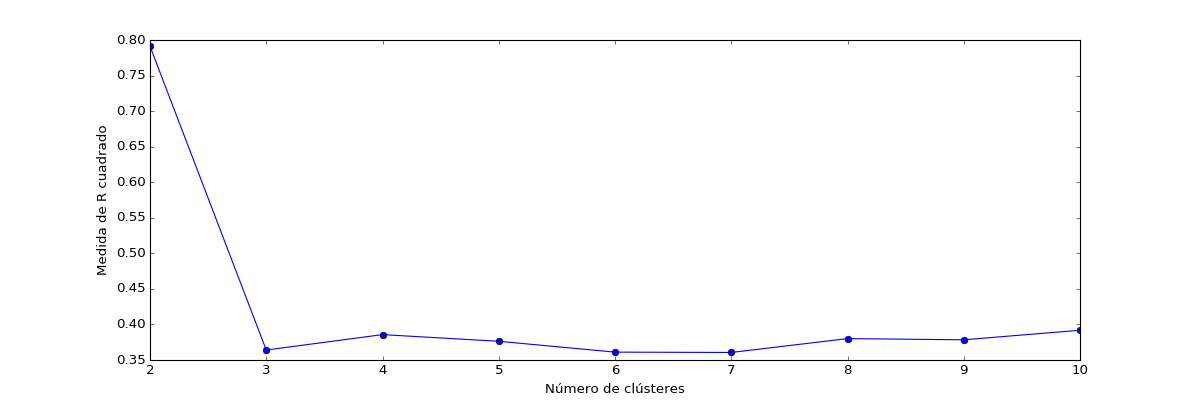

In [9]:
print("Calculando K para el array binario")
figBin = calculoDeK(documentsBin)
figBin.show()

Después de varias ejecuciones de calculoDeK, se puede ver como siempre el mejor valor es siempre 3 para el array binario. Después, dependiendo de la ejecución, la medida permanece estable o incluso aumenta.

Calculando K para el array de frecuencias


<IPython.core.display.Javascript object>


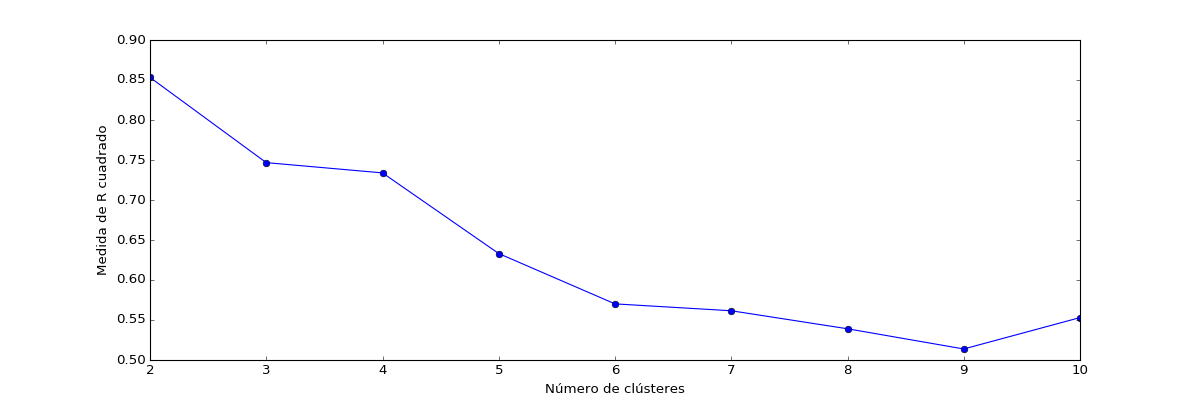

In [10]:
print("Calculando K para el array de frecuencias")
figFrec = calculoDeK(documentsFrec)
figFrec.show()

Para el caso del array de frecuencias, se puede observar como el codo se encuentra en los 6 clústeres.
A continuación, se va a proceder a ejecutar el algoritmo k-means con los K calculados en esta sección.

### Ejecucion del algoritmo K-means

In [11]:
def ejecucionKMeans(documentos, clusteres):
    modelo = KMeans(n_clusters=5)
    modelo = modelo.fit(documentos)
    prediccion = modelo.predict(documentos)
    centroides = modelo.cluster_centers_
    return centroides, prediccion

In [17]:
centrosBinarios, prediccionBinarios = ejecucionKMeans(documentsBin, 3)
print("Centros encontrados: ",centrosBinarios)
for clust in range(3):
    grupo = [index+1 for index, pred in enumerate(prediccionBinarios) if pred == clust]
    print("Documentos del grupo ", clust,":", len(grupo), grupo)

Centros encontrados:  [[  2.81892565e-18   4.09836066e-03   1.22950820e-02 ...,   1.22950820e-02
    1.22950820e-02   4.09836066e-03]
 [  1.06157113e-03   4.24628450e-03   2.12314225e-03 ...,   1.11464968e-02
    7.43099788e-03   1.06157113e-03]
 [  1.40946282e-18   1.68302945e-02   9.81767181e-03 ...,   7.01262272e-03
    1.12201964e-02   2.80504909e-03]
 [  1.99203187e-03   1.19521912e-02   1.79282869e-02 ...,   1.99203187e-03
    2.58964143e-02   1.19521912e-02]
 [  1.08420217e-19   0.00000000e+00  -2.60208521e-18 ...,   8.67361738e-18
    1.14942529e-02   1.14942529e-02]]
Documentos del grupo  0 : 244 [3, 12, 24, 35, 45, 58, 69, 80, 90, 100, 113, 126, 141, 151, 163, 175, 187, 194, 203, 212, 220, 231, 242, 252, 262, 272, 281, 292, 302, 311, 321, 331, 343, 353, 365, 377, 388, 398, 409, 422, 436, 446, 458, 469, 481, 493, 505, 516, 529, 540, 553, 566, 580, 593, 606, 619, 629, 642, 651, 662, 674, 685, 699, 710, 721, 733, 744, 756, 767, 778, 792, 801, 814, 825, 835, 847, 858, 868, 880, 8

In [12]:
centrosFrec, prediccionFrec = ejecucionKMeans(documentsFrec, 6)
print("Centros encontrados: ",centrosFrec)
for clust in range(3):
    grupo = [index+1 for index, pred in enumerate(prediccionFrec) if pred == clust]
    print("Documentos del grupo ", clust,":", len(grupo), grupo)

Centros encontrados:  [[  2.60208521e-18   3.02114804e-03   9.06344411e-03 ...,   1.20845921e-02
    1.20845921e-02   6.04229607e-03]
 [  6.46551724e-03   1.29310345e-02   1.07758621e-02 ...,   8.62068966e-03
    1.93965517e-02   6.46551724e-03]
 [  7.37257477e-18   1.42857143e-02   1.42857143e-02 ...,   4.76190476e-03
    1.42857143e-02   7.37257477e-18]
 [  0.00000000e+00   1.77514793e-02   1.77514793e-02 ...,   3.55029586e-02
    5.91715976e-03   0.00000000e+00]
 [  3.98936170e-03   6.64893617e-03   4.87588652e-03 ...,   7.53546099e-03
    1.41843972e-02   3.10283688e-03]]
Documentos del grupo  0 : 331 [3, 12, 13, 24, 35, 45, 58, 69, 80, 90, 100, 113, 126, 129, 141, 148, 151, 163, 175, 187, 194, 203, 212, 220, 231, 233, 242, 252, 262, 272, 281, 292, 302, 311, 321, 331, 334, 343, 353, 365, 377, 388, 398, 409, 422, 436, 446, 449, 458, 469, 481, 493, 505, 516, 529, 540, 553, 566, 569, 580, 593, 606, 619, 629, 642, 651, 662, 674, 685, 687, 699, 710, 721, 733, 744, 756, 767, 778, 792, 80

### Evaluacion del algoritmo K-means
A continuación se procederá a evaluar los resultados para el algoritmo K-means según las métricas intrínsecas.
Se han elegido las siguientes medidas:
- Medida R-cuadrado: mide cuán homogéneos son los clústers.
- RMSSTD: Mide lo heterogéneos que son los clústers.
- Silueta: Expresa la diferencia entre la distancia intracluster y la intercluster. Toma valores en [-1,1]. Cuanto más cercano sea su valor a uno, mejor será el conjunto generado.
- Indice Calinski-Harabasz: Suma promedio de las distancias inter e intracluster al cuadrado. A mayor valor, mejor agrupamiento.
- Indice I: Mide la separacion intercluster con respecto a la homogeneidad intracluster. A mayor valor, mejor agrupamiento.
- Medida Davies-Bouldin: Expresa el ratio entre la distancia intercluster y la intracluster. Valores pequeños para esta medida indican clústeres compactos y cuyos centros están bien separados los unos de los otros.

Para la evaluación, se han utilizado algunas de las funciones desarrolladas en clase y las que están contenidas en la librería sklearn.

In [29]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score
import itertools as it

def medida_RMSSTD(X, Xyp, cXs):
    labels = np.unique(Xyp)
    num = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
    den = X.shape[1] * np.sum([np.sum(Xyp==labels[k])-1 for k in np.arange(labels.size)])

    return np.sqrt(num/den)

def medida_I(X, Xyp, cXs, distancia):
    cXglob = np.mean(X, axis = 0) 
    labels = np.sort(np.unique(Xyp))
    maxDcs = np.max(matriz_distancias(cXs, distancia))

    num = np.sum([distancia(X[i,:], cXglob) for i in np.arange(X.shape[0])])

    den = labels.size * np.sum([np.sum([distancia(X[i,:], cXs[k,:])
                                        for i in np.arange(X.shape[0])[Xyp==labels[k]]])
                                for k in np.arange(cXs.shape[0])])
    return ((num/den)*maxDcs)

def medida_davies_bouldin(X, Xyp, cXs, distancia):
    labels = np.sort(np.unique(Xyp))
    mDcs = matriz_distancias(cXs, distancia)
    np.fill_diagonal(mDcs, np.Infinity)

    vals = np.array([1.0 / np.sum(Xyp==labels[k]) * np.sum([distancia(X[i,:], cXs[k,:])
                                                            for i in np.arange(X.shape[0])[Xyp==labels[k]]])
                     for k in np.arange(cXs.shape[0])])
    res = 1.0/labels.size*np.sum([np.max([(vals[k]+vals[kp])/mDcs[k,kp] 
                                          for kp in np.arange(labels.size)])
                                  for k in np.arange(labels.size)])
    return res

def distancia_euclidiana(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def evaluarClusters(nombre, documentos, prediccion, centroides):
    print('Medida silueta-',nombre,":",silhouette_score(documentos,prediccion))
    print('Indice Calinski-Harabasz-',nombre,":",calinski_harabaz_score(documentos, prediccion))
    print('Indice I-',nombre,":",medida_I(documentos, prediccion, centroides, distancia_euclidiana))
    print('Medida Davies-Bouldin-',nombre,":",medida_davies_bouldin(documentos, prediccion, centroides, distancia_euclidiana))
    print('Medida RMSSTD-',nombre,":",medida_RMSSTD(documentos, prediccion, centroides))
    print('Medida R Cuadrado-',nombre,":",medida_R_cuadrado(documentos, prediccion, centroides))

In [30]:
evaluarClusters("bin", documentsBin, prediccionBinarios, centrosBinarios)

Medida silueta- bin : 0.0832088883094
Indice Calinski-Harabasz- bin : 101.3873025
Indice I- bin : 2.25137181144
Medida Davies-Bouldin- bin : 6.00912533329
Medida RMSSTD- bin : 0.49419682089
Medida R Cuadrado- bin : 0.378861134056


In [31]:
evaluarClusters("frec",documentsFrec, prediccionFrec, centrosFrec)

Medida silueta- frec : 0.158650441618
Indice Calinski-Harabasz- frec : 124.056951767
Indice I- frec : 3.75702472142
Medida Davies-Bouldin- frec : 3.78486300553
Medida RMSSTD- frec : 0.936442600435
Medida R Cuadrado- frec : 0.645464496154


Según todas las medidas, se puede observar que el agrupamiento generado por los documentos en formato de frecuencia es mejor que el representado por el array binario, debido a lo expuesto en la explicación de cada medida. 

## Clustering Jerárquico - Clustering Aglomerativo
Este tipo de clustering busca una jerarquía de clústeres, que puede entenderse como una evolución o secuencia ordenada del agrupamiento desde K = 1.
La aproximación que se va a utilizar comienza creando n clusteres y asignando cada ejemplo de entrenamiento a cada uno de ellos. A cada paso, se seleccionan dos con la menor disimilitud interclúster entre ellos y se combinan. Este proceso se repite hasta que se fusionan los dos últimos clústeres.

In [36]:
def disimilitud_media(mD, clust_actuales, particion):
    mDC = np.zeros(clust_actuales.size**2)
    mDC.shape = (clust_actuales.size,clust_actuales.size)
    for n1 in np.arange(clust_actuales.size):
        exC1 = np.where(particion==clust_actuales[n1])[0]
        for n2 in np.arange(clust_actuales.size):
            exC2 = np.where(particion==clust_actuales[n2])[0]
            mDC[n1,n2] = np.mean(mD[np.ix_(exC1,exC2)])
    # Rellenamos la matriz diagonal para evitar que se proponga
    # la unión de un clúster consigo mismo
    np.fill_diagonal(mDC, np.max(mDC)*2)
    return mDC

def disimilitud_maxima(mD, clust_actuales, particion):
    mDC = np.zeros(clust_actuales.size**2)
    mDC.shape = (clust_actuales.size,clust_actuales.size)
    for n1 in np.arange(clust_actuales.size):
        exC1 = np.where(particion==clust_actuales[n1])[0]
        for n2 in np.arange(clust_actuales.size):
            exC2 = np.where(particion==clust_actuales[n2])[0]
            mDC[n1,n2] = np.max(mD[np.ix_(exC1,exC2)])
    # Rellenamos la matriz diagonal para evitar que se proponga
    # la unión de un clúster consigo mismo
    np.fill_diagonal(mDC, np.max(mDC)*2)
    return mDC

def disimilitud_minima(mD, clust_actuales, particion):
    mDC = np.zeros(clust_actuales.size**2)
    mDC.shape = (clust_actuales.size,clust_actuales.size)
    for n1 in np.arange(clust_actuales.size):
        exC1 = np.where(particion==clust_actuales[n1])[0]
        for n2 in np.arange(clust_actuales.size):
            exC2 = np.where(particion==clust_actuales[n2])[0]
            mDC[n1,n2] = np.min(mD[np.ix_(exC1,exC2)])
    # Rellenamos la matriz diagonal para evitar que se proponga
    # la unión de un clúster consigo mismo
    np.fill_diagonal(mDC, np.max(mDC)*2)
    return mDC

def clustering_aglomerativo(mD, criterio):
    mParticiones = np.zeros(mD.shape[0]**2, dtype = np.int8)
    mParticiones.shape = (mD.shape[0], mD.shape[0])
    mParticiones[:,21] = np.arange(22)

    # Recorremos de manera decreciente 
    # ya que sabemos que el número de uniones es exactamente de n-1

    a = np.array(range(mParticiones.shape[1]-1))
    for n in a[::-1]:
        mParticiones[:,n] = mParticiones[:,n+1]

        clust_actuales = np.unique(mParticiones[:,n])
        mDC = criterio(mD, clust_actuales, mParticiones[:,n])

        ind = np.unravel_index(np.argmin(mDC, axis=None), mDC.shape)
        mParticiones[mParticiones[:,n]==clust_actuales[ind[1]],n] = clust_actuales[ind[0]]

    return mParticiones

def plot_dendrograma_de_mparticiones(mD, mParticiones):
    nPasos = mD.shape[0]-1
    distancias = np.zeros(nPasos)
    tamanyos = np.zeros(nPasos)
    uniones = np.zeros(2*nPasos,dtype=np.int8)
    uniones.shape=(nPasos,2)

    mNParticiones = mParticiones.copy()
    for n in np.arange(mNParticiones.shape[0]):
        valor = mParticiones[n,mNParticiones.shape[1]-1]
        mNParticiones[mParticiones==valor] = n

    k = 0
    aux = np.array(range(mNParticiones.shape[1]-1))
    for n in aux[::-1]:
        # cual es el diferente?
        prim_diferencia = np.where(mParticiones[:,n]!=mParticiones[:,n+1])[0][0]
        submatriz = mNParticiones[:,:n+1]
        submatriz[submatriz==mNParticiones[prim_diferencia,n]] = mNParticiones.shape[1]+k
        mNParticiones[:,:n+1] = submatriz
        uniones[k,:] = np.unique(mNParticiones[mNParticiones[:,n]==mNParticiones.shape[1]+k,n+1])
        tamanyos[k] = np.sum(mNParticiones[:,n]==mNParticiones.shape[1]+k)

        vs = mNParticiones[:,n+1]
        distancias[k] = 1 / (2 * tamanyos[k]) * (    
            np.sum(mD[ np.ix_(np.where(vs == uniones[k,0])[0],
                              np.where(vs == uniones[k,1])[0])])+
            np.sum(mD[ np.ix_(np.where(vs == uniones[k,1])[0],
                              np.where(vs == uniones[k,0])[0])]))
        k += 1

    distancias = np.arange(uniones.shape[0])
    # Creamos la matriz de enlaces que necesita el método dendrogram de scipy
    mEnlaces = np.column_stack([uniones, distancias, tamanyos]).astype(float)

    plt.figure(figsize=(25, 10))
    plt.title('Dendrograma de Clustering Jerárquico')
    plt.xlabel('Índice del caso')
    plt.ylabel('Distancia')
    dendrogram(mEnlaces)
    plt.show()

In [ ]:
mDBin = matriz_distancias(documentsBin, distancia_euclidiana)

mParticiones = clustering_aglomerativo(mDBin, disimilitud_minima)
plot_dendrograma_de_mparticiones(mDBin,mParticiones)

mParticiones = clustering_aglomerativo(mDBin, disimilitud_maxima)
plot_dendrograma_de_mparticiones(mDBin,mParticiones)

mParticiones = clustering_aglomerativo(mDBin, disimilitud_media)
plot_dendrograma_de_mparticiones(mDBin,mParticiones)

In [ ]:
mDFrec = matriz_distancias(documentsFrec, distancia_euclidiana)

mParticiones = clustering_aglomerativo(mDFrec, disimilitud_minima)
plot_dendrograma_de_mparticiones(mDFrec,mParticiones)

mParticiones = clustering_aglomerativo(mDFrec, disimilitud_maxima)
plot_dendrograma_de_mparticiones(mDFrec,mParticiones)

mParticiones = clustering_aglomerativo(mDBin, disimilitud_media)
plot_dendrograma_de_mparticiones(mDFrec,mParticiones)